<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Metadata" data-toc-modified-id="Metadata-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Metadata</a></span></li><li><span><a href="#%-classified" data-toc-modified-id="%-classified-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>% classified</a></span><ul class="toc-item"><li><span><a href="#Writing-metadata" data-toc-modified-id="Writing-metadata-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Writing metadata</a></span></li></ul></li><li><span><a href="#Bracken-tables" data-toc-modified-id="Bracken-tables-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Bracken tables</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Overlap-of-keys" data-toc-modified-id="Overlap-of-keys-4.3.1.1"><span class="toc-item-num">4.3.1.1&nbsp;&nbsp;</span>Overlap of keys</a></span></li></ul></li></ul></li><li><span><a href="#Filtering-outliers" data-toc-modified-id="Filtering-outliers-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Filtering outliers</a></span><ul class="toc-item"><li><span><a href="#Filtering" data-toc-modified-id="Filtering-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Filtering</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Writing-table" data-toc-modified-id="Writing-table-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Writing table</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Summarizing Bracken count table
* Formatting and filtering as necessary

# Var

In [9]:
# working dir
work_dir = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/'

# metadata
## filtered
metadata_filt_file = file.path(work_dir, 'CurMetDat_metadata_filt-n1846.tsv')
## all 
base_in_dir = '/ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval/'
metadata_file = file.path(base_in_dir, 'CurMetDat-metagenomes', 'files', 'metadata', 'Filtered_CurMetDat_ff.tsv')

# metagenome profiling dir
profile_dir = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/LLMGP/'

# params
threads = 8

# Init

In [10]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
#library(dtplyr)
library(tidytable)
library(ape)
library(phyloseq)
library(LeyLabRMisc)

In [11]:
df.dims()
setDTthreads(threads)
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/ 


# Load

## Metadata

In [12]:
# all metadata
meta = Fread(metadata_file) %>%
    mutate.(Sample = gsub('-', '.', Sample)) %>%
    filter.(number_reads >= 5e5)
meta %>% pull.(Sample) %>% unique_n('Samples')
meta %>% pull.(subjectID) %>% unique_n('Subjects')
meta

Warning message in require_bit64_if_needed(ans):
“Some columns are type 'integer64' but package bit64 is not installed. Those columns will print as strange looking floating point data. There is no need to reload the data. Simply install.packages('bit64') to obtain the integer64 print method and print the data again.”


No. of unique Samples: 3582 
No. of unique Subjects: 3189 


dataset_name,Sample,subjectID,body_site,antibiotics_current_use,study_condition,disease,age,age_category,gender,⋯,il_1,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<lgl>
AsnicarF_2017,MV_FEM1_t1Q14,MV_FEM1,stool,NA,control,healthy,NA,adult,female,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
AsnicarF_2017,MV_FEM2_t1Q14,MV_FEM2,stool,NA,control,healthy,NA,adult,female,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZellerG_2014,CCIS82944710ST.20.0,FR-730,stool,NA,control,healthy,38,adult,female,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
ZellerG_2014,CCIS93040568ST.20.0,FR-682,stool,NA,control,healthy,65,adult,male,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE


In [14]:
# filtered
meta_f = Fread(metadata_filt_file) %>%
    mutate.(Sample = gsub('-', '.', Sample)) %>%
    filter.(number_reads >= 5e5)
meta_f %>% pull.(Sample) %>% unique_n('Samples')
meta_f %>% pull.(subjectID) %>% unique_n('Subjects')
meta_f

Warning message in require_bit64_if_needed(ans):
“Some columns are type 'integer64' but package bit64 is not installed. Those columns will print as strange looking floating point data. There is no need to reload the data. Simply install.packages('bit64') to obtain the integer64 print method and print the data again.”


No. of unique Samples: 1802 
No. of unique Subjects: 1629 


dataset,Sample,Run,Lane,Remote,subjectID,body_site,antibiotics_current_use,study_condition,disease,⋯,il_1,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<chr>,<lgl>,<int>,<int>,<lgl>
Bengtsson-PalmeJ_2015,TRAVELRES1,1,1,ERR636349,TRAVELRES1_2,stool,no,control,healthy,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
Bengtsson-PalmeJ_2015,TRAVELRES10,1,1,ERR636358,TRAVELRES9_10,stool,no,control,healthy,⋯,NA,NA,LKA,NA,NA,NA,NA,1,1,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YeZ_2018,YEZ_N.38,1,1,SRR8675918,YEZ_N-38,stool,no,control,healthy,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
YeZ_2018,YEZ_N.37,1,1,SRR8675921,YEZ_N-37,stool,no,control,healthy,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE


## % classified

In [15]:
# listing files
brk_uncls_files = list_files(profile_dir, 'all-combined_kraken-unclassified.tsv')
brk_uncls_files = brk_uncls_files[!grepl('(34_HuBif|36_EcoEvo)', brk_uncls_files)]
brk_uncls_files %>% length
brk_uncls_files %>% head(n=3)

[1] 33

[1] "/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/LLMGP//01_CosteaPI_2017/kraken/all-combined_kraken-unclassified.tsv"      
[2] "/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/LLMGP//02_Obregon-TitoAJ_2015/kraken/all-combined_kraken-unclassified.tsv"
[3] "/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/LLMGP//03_PasolliE_2018/kraken/all-combined_kraken-unclassified.tsv"

In [9]:
# reading in tables
brk_uncls = brk_uncls_files %>%
    files_to_list(-2) %>%
    plyr::llply(Fread) %>%
    data.table::rbindlist(use.names=TRUE, idcol='Dataset') %>%
    dt_mutate(Dataset = gsub('^[0-9]+_', '', Dataset),
              sample = gsub('-', '.', sample))

brk_uncls  %>% unique_n('Samples', sample)
brk_uncls

No. of unique Samples: 3360 


Dataset,sample,percent_reads,num_reads_mapped_to_clade,num_reads_mapped_to_taxon,rank_code,taxID,scientific_name
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<chr>
CosteaPI_2017,halbarad.11.0.0,18.60,185981,185981,U,0,unclassified
CosteaPI_2017,scavenger.11.60.0,10.99,109942,109942,U,0,unclassified
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YuJ_2015,SZAXPI017591.140,28.00,279999,279999,U,0,unclassified
YuJ_2015,SZAXPI017592.142,21.41,214099,214099,U,0,unclassified


In [10]:
# checking key overlap
overlap(brk_uncls, meta, sample, Sample)
cat('---\n')
overlap(brk_uncls, meta, Dataset, dataset_name)

intersect(x,y): 3348 
setdiff(x,y): 12 
setdiff(y,x): 234 
union(x,y): 3594 
---
intersect(x,y): 33 
setdiff(x,y): 0 
setdiff(y,x): 4 
union(x,y): 37 


In [11]:
# joining with metadata
brk_uncls = brk_uncls %>%
    dt_inner_join(meta %>% 
                      dt_rename('sample' = Sample, 
                                'Dataset' = dataset_name), 
                  by=c('sample', 'Dataset')) 

brk_uncls

Dataset,sample,percent_reads,num_reads_mapped_to_clade,num_reads_mapped_to_taxon,rank_code,taxID,scientific_name,subjectID,body_site,⋯,il_1,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<lgl>
AsnicarF_2017,MV_FEM1_t1Q14,16.14,161357,161357,U,0,unclassified,MV_FEM1,stool,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
AsnicarF_2017,MV_FEM2_t1Q14,24.81,248051,248051,U,0,unclassified,MV_FEM2,stool,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZeeviD_2015,PNP_Validation_45,19.22,192152,192152,U,0,unclassified,PNP_Validation_45,stool,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
ZeeviD_2015,PNP_Validation_46,17.94,179448,179448,U,0,unclassified,PNP_Validation_46,stool,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE


In [12]:
# samples
brk_uncls %>% unique_n('Samples', sample)

No. of unique Samples: 3348 


In [14]:
# summarizing
brk_uncls_s = brk_uncls %>%
    dt_mutate(perc_reads_cls = 100 - percent_reads) %>%
    dt_mutate(median_perc_reads_cls = median(perc_reads_cls), 
              by=c(Dataset)) %>%
    dt_mutate(Dataset = Dataset %>% reorder(-median_perc_reads_cls)) 

brk_uncls_s

Dataset,sample,percent_reads,num_reads_mapped_to_clade,num_reads_mapped_to_taxon,rank_code,taxID,scientific_name,subjectID,body_site,⋯,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized,perc_reads_cls,median_perc_reads_cls
<fct>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<lgl>,<dbl>,<dbl>
AsnicarF_2017,MV_FEM1_t1Q14,16.14,161357,161357,U,0,unclassified,MV_FEM1,stool,⋯,NA,NA,NA,NA,NA,1,1,TRUE,83.86,80.875
AsnicarF_2017,MV_FEM2_t1Q14,24.81,248051,248051,U,0,unclassified,MV_FEM2,stool,⋯,NA,NA,NA,NA,NA,1,1,TRUE,75.19,80.875
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZeeviD_2015,PNP_Validation_45,19.22,192152,192152,U,0,unclassified,PNP_Validation_45,stool,⋯,NA,NA,NA,NA,NA,1,1,TRUE,80.78,78.6
ZeeviD_2015,PNP_Validation_46,17.94,179448,179448,U,0,unclassified,PNP_Validation_46,stool,⋯,NA,NA,NA,NA,NA,1,1,TRUE,82.06,78.6


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
% reads mapped,16.68,76.0075,80.74,79.59028,84.6825,99.33,28.684,11.71


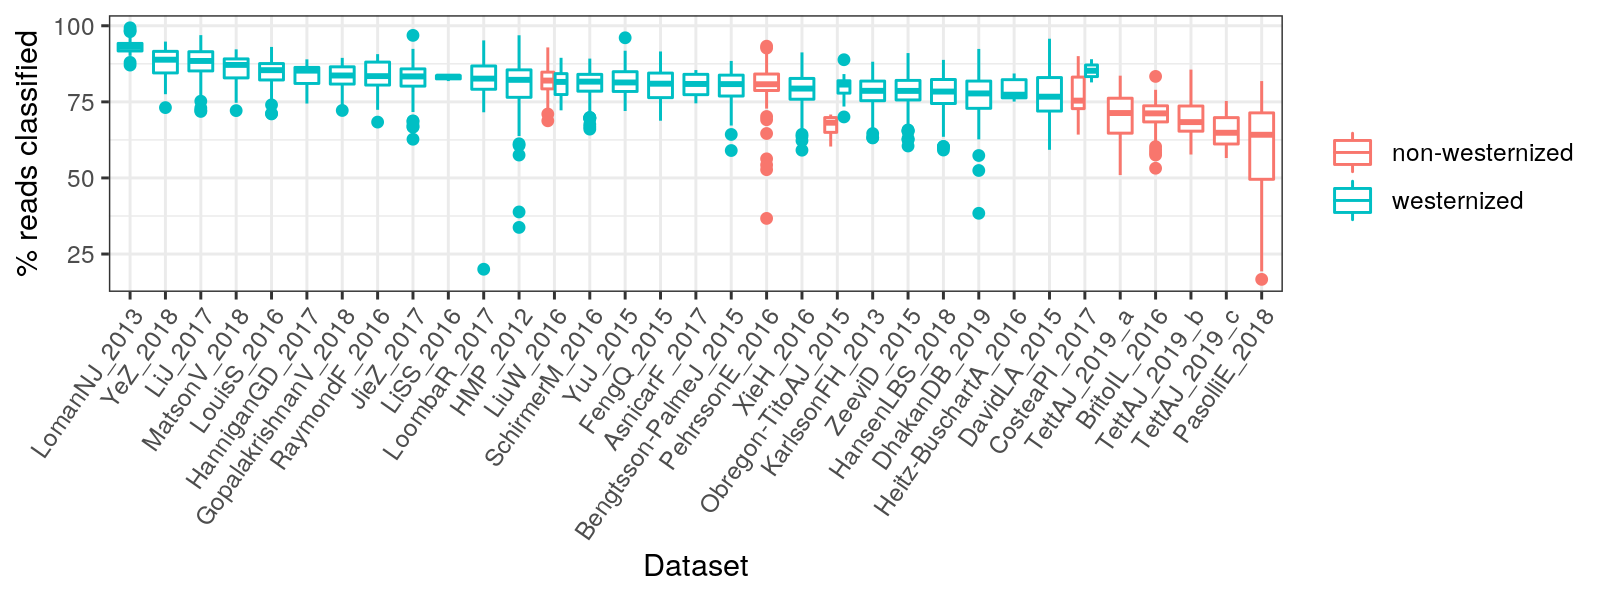

In [15]:
# plotting

brk_uncls_s %>% dt_pull(perc_reads_cls) %>% summary_x('% reads mapped')

p = brk_uncls_s %>%
    dt_mutate(westernized = ifelse(westernized, 'westernized', 'non-westernized')) %>%
    ggplot(aes(Dataset, perc_reads_cls, color=westernized)) +
    geom_boxplot() +
    scale_color_discrete('') +
    labs(y='% reads classified') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )
    
p.dims(8,3)
plot(p)

### Writing metadata

In [25]:
brk_uncls %>%
    dt_distinct(Dataset, sample, subjectID, study_condition, age, BMI, 
                gender, westernized, disease, country) %>%
    dt_rename('study' = Dataset,
              'sample' = sample,
              'subject' = subjectID) %>%
    write_table(file.path(work_dir, 'metadata_filtered_SupTable1.tsv'))

File written: /ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity//metadata_filtered_SupTable1.tsv 


## Bracken tables

In [7]:
# listing files
brk_cls_files = list_files(profile_dir, 'all-combined-bracken.tsv') 
brk_cls_files = brk_cls_files[!grepl('(34_HuBif|36_EcoEvo)', brk_cls_files)]
brk_cls_files %>% length
brk_cls_files %>% head(n=3)

[1] 33

[1] "/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/LLMGP//01_CosteaPI_2017/kraken/all-combined-bracken.tsv"      
[2] "/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/LLMGP//02_Obregon-TitoAJ_2015/kraken/all-combined-bracken.tsv"
[3] "/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/LLMGP//03_PasolliE_2018/kraken/all-combined-bracken.tsv"

In [8]:
# reading tables
brk_cls = brk_cls_files %>% files_to_list(-2) %>%
    plyr::llply(read_bracken) %>%
    data.table::rbindlist(use.names=TRUE, idcol='dataset') %>%
    dt_mutate(dataset = gsub('^[0-9]+_', '', dataset))

brk_cls

dataset,name,taxonomy_id,taxonomy_lvl,Domain,Phylum,Class,Order,Family,Genus,Species,Sample,Abundance
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
CosteaPI_2017,s__Caecibacter massiliensis,108259,S,Bacteria,Firmicutes_C,Negativicutes,Veillonellales,Megasphaeraceae,Caecibacter,Caecibacter massiliensis,halbarad.11.0.0,0
CosteaPI_2017,s__UBA1777 sp002350825,178550,S,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,UBA1777,UBA1777 sp002350825,halbarad.11.0.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YuJ_2015,s__Serratia grimesii,121568,S,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Serratia,Serratia grimesii,SZAXPI017592.142,0
YuJ_2015,s__Bacteroides_A sp002161565,119189,S,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides_A,Bacteroides_A sp002161565,SZAXPI017592.142,0


### Summary

In [9]:
# summary
brk_cls %>% dt_pull(name) %>% unique_n('Taxa')

No. of unique Taxa: 5096 


In [10]:
# summary
brk_cls %>% dt_pull(Sample) %>% unique_n('Samples')

No. of unique Samples: 3360 


In [11]:
# summary
brk_cls %>% dt_pull(Phylum) %>% unique_n('Phyla')

No. of unique Phyla: 57 


In [12]:
# summary: number of phyla per domain
brk_cls %>%
    dt_distinct(Domain, Phylum) %>%
    dt_count(Domain)

Domain,N
<chr>,<int>
Bacteria,49
Archaea,8


#### Overlap of keys

In [13]:
overlap(brk_cls, meta, Sample, Sample)

intersect(x,y): 3348 
setdiff(x,y): 12 
setdiff(y,x): 234 
union(x,y): 3594 


In [14]:
overlap(brk_cls, meta_f, Sample, Sample)

intersect(x,y): 1799 
setdiff(x,y): 1561 
setdiff(y,x): 3 
union(x,y): 3363 


## Filtering outliers

In [15]:
# total counts per sample
brk_cls %>%
    dt_summarize(Abundance = sum(Abundance), by=list(Sample)) %>%
    dt_pull(Abundance) %>% summary_x('Abundance')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
Abundance,0,0.99997,1,0.9994059,1.00003,1.00019,0.408,0.167


In [16]:
# low abundance samples
brk_cls_low_abund = brk_cls %>%
    dt_summarize(Abundance = sum(Abundance), by=list(Sample)) %>%
    dt_filter(Abundance < 0.99)

brk_cls_low_abund

Sample,Abundance
<chr>,<dbl>
SID5420.4,0
LD.Run2.17,0


In [17]:
# total non-zero taxa per sample
brk_cls_bad = brk_cls %>%
    dt_filter(Abundance > 0) %>%
    dt_summarize(n_taxa = n_distinct(name), by=list(Sample)) 

brk_cls_bad %>% dt_pull(n_taxa) %>% summary_x('No. of taxa')
cat('Samples with <30 taxa:\n')
df.dims(30)
brk_cls_bad %>% dt_filter(n_taxa < 10)
df.dims()

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
No. of taxa,2,237,279,274.0024,317,492,157.761,64.406


Samples with <30 taxa:


Sample,n_taxa
<chr>,<int>
LD.Run2.31,2


In [18]:
# number of taxa in "bad" samples
df.dims(30)
brk_cls_bad %>% 
    dt_filter(n_taxa < 10) 
df.dims()

Sample,n_taxa
<chr>,<int>
LD.Run2.31,2


In [19]:
# samples with low numbers of samples
too_few_taxa = brk_cls_bad %>% 
    dt_filter(n_taxa < 10) %>%
    dt_pull(Sample)
too_few_taxa

[1] "LD.Run2.31"

### Filtering

In [20]:
# number of samples before filtering
n_samps = brk_cls %>% dt_distinct(Sample) %>% dt_pull(Sample) %>% length
n_samps

[1] 3360

In [21]:
# filtering
brk_cls = brk_cls %>%
    dt_filter(! Sample %in% too_few_taxa) %>%
    dt_filter(! Sample %in% dt_pull(brk_cls_low_abund, Sample))

brk_cls

dataset,name,taxonomy_id,taxonomy_lvl,Domain,Phylum,Class,Order,Family,Genus,Species,Sample,Abundance
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
CosteaPI_2017,s__Caecibacter massiliensis,108259,S,Bacteria,Firmicutes_C,Negativicutes,Veillonellales,Megasphaeraceae,Caecibacter,Caecibacter massiliensis,halbarad.11.0.0,0
CosteaPI_2017,s__UBA1777 sp002350825,178550,S,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,UBA1777,UBA1777 sp002350825,halbarad.11.0.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YuJ_2015,s__Serratia grimesii,121568,S,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Serratia,Serratia grimesii,SZAXPI017592.142,0
YuJ_2015,s__Bacteroides_A sp002161565,119189,S,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides_A,Bacteroides_A sp002161565,SZAXPI017592.142,0


In [22]:
# number of samples remaining
n_samps = brk_cls %>% dt_distinct(Sample) %>% dt_pull(Sample) %>% length
n_samps

[1] 3357

In [23]:
# taxon prevalence
brk_cls_prev = brk_cls %>%
    dt_filter(Abundance > 0) %>%
    dt_summarize(prev = n_distinct(Sample), by=list(name)) 

brk_cls_prev %>% dt_pull(prev) %>% summary_x
taxa_to_rm = brk_cls_prev %>% dt_filter(prev < 2) %>% dt_pull(name)
taxa_to_rm %>% length

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,1,1,4,180.553,43,3233,1302.961,531.932


[1] 1546

In [24]:
# high prevalence taxa
df.dims(20)
brk_cls_prev %>%
    dt_filter(prev > 3000) %>%
    dt_arrange(-prev) %>%
    dt_slice_head(20)
df.dims()

name,prev
<chr>,<int>
s__Roseburia inulinivorans,3233
s__Blautia_A wexlerae,3229
s__Faecalibacterium prausnitzii_G,3204
s__Faecalibacterium prausnitzii_D,3194
s__Faecalibacterium prausnitzii_C,3182
s__Bacteroides_B vulgatus,3164
s__Acetatifactor sp900066565,3150
s__Bacteroides uniformis,3148
s__Faecalibacterium prausnitzii_E,3146


In [25]:
# filtering based on prevalence
brk_cls = brk_cls %>%
    dt_filter(! name %in% taxa_to_rm) 
brk_cls

dataset,name,taxonomy_id,taxonomy_lvl,Domain,Phylum,Class,Order,Family,Genus,Species,Sample,Abundance
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
CosteaPI_2017,s__Caecibacter massiliensis,108259,S,Bacteria,Firmicutes_C,Negativicutes,Veillonellales,Megasphaeraceae,Caecibacter,Caecibacter massiliensis,halbarad.11.0.0,0
CosteaPI_2017,s__UBA1777 sp002350825,178550,S,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,UBA1777,UBA1777 sp002350825,halbarad.11.0.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YuJ_2015,s__Serratia grimesii,121568,S,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Serratia,Serratia grimesii,SZAXPI017592.142,0
YuJ_2015,s__Bacteroides_A sp002161565,119189,S,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides_A,Bacteroides_A sp002161565,SZAXPI017592.142,0


In [26]:
# number of samples remaining
n_samps = brk_cls %>% dt_distinct(Sample) %>% dt_pull(Sample) %>% length
cat('Number of samples:', n_samps, '\n')

Number of samples: 3357 


In [27]:
# low abundance samples?
brk_cls_low_abund2 = brk_cls %>%
    dt_summarize(Abundance = sum(Abundance), by=list(Sample)) 

brk_cls_low_abund2 %>% dt_pull(Abundance) %>% summary_x
brk_cls_low_abund2 %>% dt_filter(Abundance < 0.9)

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,0.94103,0.99995,0.99999,0.9997463,1.00003,1.00019,0.024,0.01


Sample,Abundance
<chr>,<dbl>


## Summary

In [28]:
brk_cls_j = brk_cls %>%
    dt_inner_join(meta %>% 
                      dt_rename('dataset'=dataset_name) %>%
                      dt_select(Sample, dataset, study_condition, disease, 
                                age, gender, country, westernized),
                  by=c('Sample', 'dataset'))

brk_cls_j

Warning message in if (by_x %notin% colnames(x)) stop("by.x columns not in x"):
“the condition has length > 1 and only the first element will be used”
Warning message in if (by_y %notin% colnames(y)) stop("by.y columns not in y"):
“the condition has length > 1 and only the first element will be used”


dataset,name,taxonomy_id,taxonomy_lvl,Domain,Phylum,Class,Order,Family,Genus,Species,Sample,Abundance,study_condition,disease,age,gender,country,westernized
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>
AsnicarF_2017,s__UBA1777 sp002350825,178550,S,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,UBA1777,UBA1777 sp002350825,MV_FEM1_t1Q14,0,control,healthy,NA,female,ITA,TRUE
AsnicarF_2017,s__Hespellia stercorisuis,173762,S,Bacteria,Firmicutes_A,Clostridia,Lachnospirales,Lachnospiraceae,Hespellia,Hespellia stercorisuis,MV_FEM1_t1Q14,0,control,healthy,NA,female,ITA,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZeeviD_2015,s__UBA2813 sp900319365,118664,S,Bacteria,Cyanobacteria,Vampirovibrionia,Gastranaerophilales,Gastranaerophilaceae,UBA2813,UBA2813 sp900319365,PNP_Validation_46,0,control,healthy,NA,NA,ISR,TRUE
ZeeviD_2015,s__Bifidobacterium subtile,131154,S,Bacteria,Actinobacteriota,Actinobacteria,Actinomycetales,Bifidobacteriaceae,Bifidobacterium,Bifidobacterium subtile,PNP_Validation_46,0,control,healthy,NA,NA,ISR,TRUE


In [29]:
brk_cls_j %>% unique_n('samples', Sample)
brk_cls_j %>% unique_n('datasets', dataset)
brk_cls_j %>% unique_n('species', Species)
brk_cls_j %>% unique_n('genera', Genus)
brk_cls_j %>% unique_n('phyla', Phylum)

No. of unique samples: 3348 
No. of unique datasets: 33 
No. of unique species: 3550 
No. of unique genera: 1152 
No. of unique phyla: 37 


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
Samples per study,3,27,51,101.4545,119,446,163.459,66.732


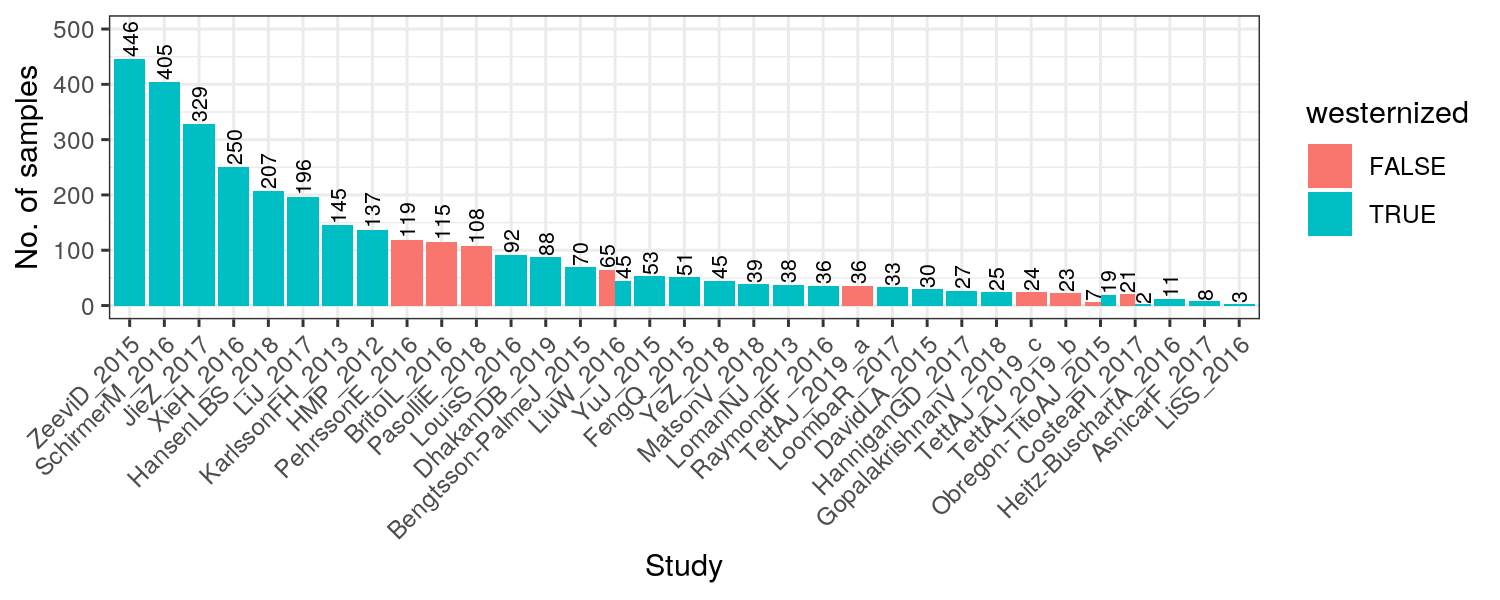

In [38]:
# samples per study
brk_cls_j %>%
    dt_distinct(Sample, dataset) %>%
    dt_count(by=list(dataset)) %>%
    dt_pull(N) %>% summary_x('Samples per study')

p = brk_cls_j %>%
    dt_distinct(Sample, dataset, westernized) %>%
    dt_count(by=list(dataset, westernized)) %>%
    dt_mutate(dataset = reorder(dataset, -N)) %>%
    ggplot(aes(dataset, N, fill=westernized)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(label=N), hjust=-0.05, size=2.7, angle=90,
              position=position_dodge(width=0.9)) +
    scale_y_continuous(limits=c(0, 500)) +
    labs(x='Study', y='No. of samples') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(7.5,3)
plot(p)

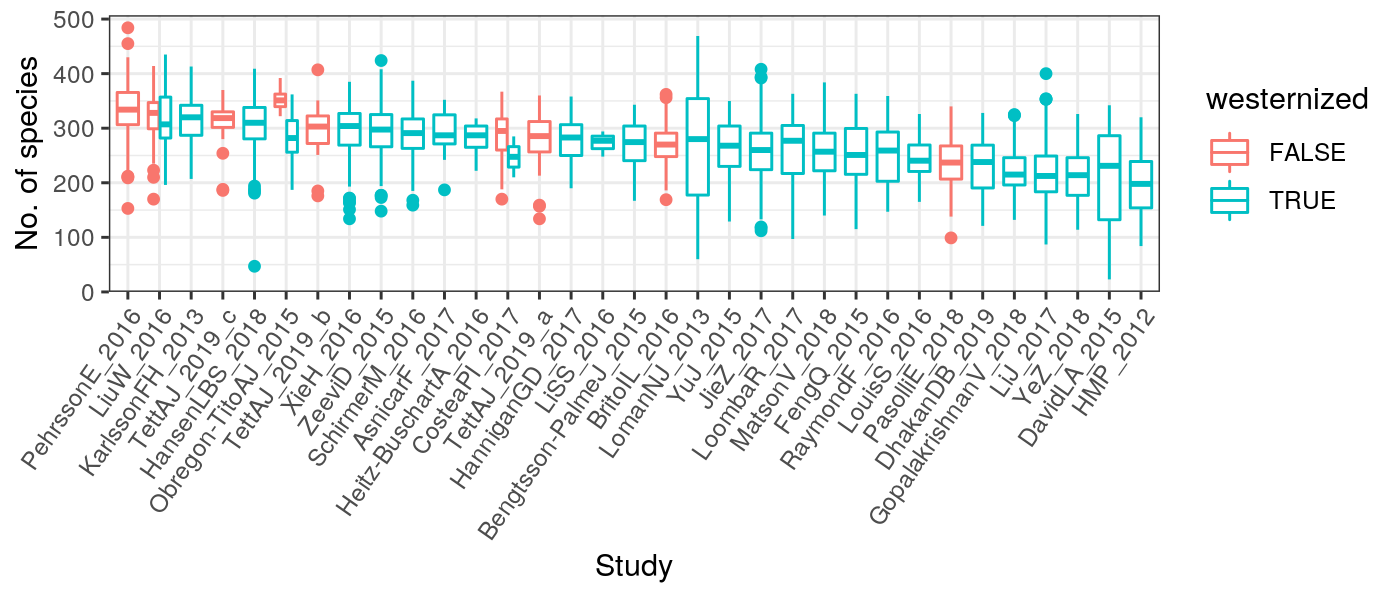

In [31]:
# species per sample
p = brk_cls_j %>%
    dt_filter(Abundance > 0) %>%
    dt_count(by=list(dataset, Sample, westernized)) %>%
    dt_mutate(dataset = reorder(dataset, -N)) %>%
    ggplot(aes(dataset, N, color=westernized)) +
    geom_boxplot() +
    labs(x='Study', y='No. of species') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )

p.dims(7,3)
plot(p)

## Writing table

* serializing

In [32]:
outF = file.path(work_dir, 'bracken_filt.qs')
brk_cls %>% 
    as.data.table %>%
    qs::qsave(file=outF, nthreads=4)
cat('File written:', outF, '\n')

File written: /ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity//bracken_filt.qs 


In [33]:
# clearing memory
rm(brk_cls)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,4268075,228.0,7043794,376.2,7043794,376.2
Vcells,94730558,722.8,255841174,1952.0,254906420,1944.8


# sessionInfo

In [34]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/phyloseq/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] LeyLabRMisc_0.1.3 phyloseq_1.30.0   ape_5.3           tidytable_0.3.2  
[5] dtplyr_1.0.0      data.table_1.12.8 ggplot2_3.2.1     tidyr_1.0.0      
[9] dplyr_0.8.3      

loaded via a namespace (and not attached):
 [1] Biobase_2.46.0      bit64_0.9-7         jsonlite_1.6       
